<font color=Green size=6> **政府电话数据分析** </font>  

<font color=gray size=3> **—— 何数学** </font>  


## （a）：数据读入

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [258]:
train = pd.read_csv(r'.\dataset\train_set.csv')
test = pd.read_csv(r'.\dataset\test_set.csv')

In [238]:
print('Shape of training set:',train.shape)
print('Shape of test set:',test.shape)
train.head()

Shape of training set: (1900, 6236)
Shape of test set: (100, 6236)


,单位名称,换车,商户,吉林大路,还在,给出,安全标准,地,是因为,东北师范大学,...,绿园,门将,研究所,世纪家园,水务,提醒,照,煦,煤,后门
0,市供热公司,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,市水务集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,市水务集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,市燃气集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,市公交集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## （b）：市民投诉量统计分析
#### （b1）：训练集中各政府单位所接投诉量的柱状图（按投诉量降序）

In [239]:
# 查看所有政府部门
dep_list = list(train['单位名称'].unique())
print('所有政府部门：',dep_list)

所有政府部门： ['市供热公司', '市水务集团', '市燃气集团', '市公交集团', '市房地集团', '市运输管理局', '市供电公司']


In [240]:
# 各政府单位所接投诉量
num_per_dep = {} 
for key in dep_list:
    num_per_dep[key] = len(train.groupby('单位名称').groups[key]) 
    
# dict转dataframe方便排序画图    
num_per_dep_df = pd.DataFrame.from_dict(num_per_dep, orient = 'index',columns = ['投诉量']) 
num_per_dep_df = num_per_dep_df.sort_values(by = '投诉量', ascending = False)
num_per_dep_df

,投诉量
市水务集团,557
市供热公司,332
市运输管理局,330
市燃气集团,285
市公交集团,207
市房地集团,96
市供电公司,93


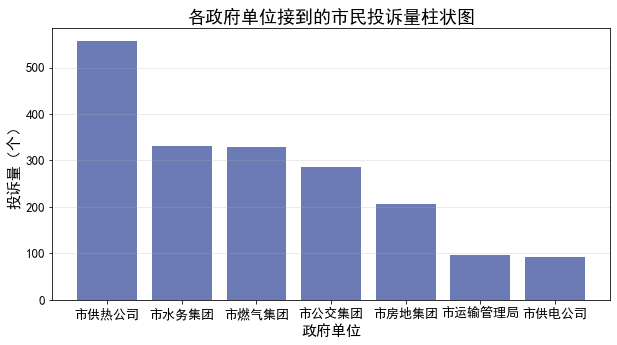

In [241]:
# 绘制柱状图

# 解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (10,5))
plt.bar(range(len(dep_list)), num_per_dep_df['投诉量'], tick_label = dep_list, color = '#6C7AB5')
plt.title('各政府单位接到的市民投诉量柱状图',fontsize=18)
plt.ylabel('投诉量（个）',fontsize=15)
plt.xlabel('政府单位',fontsize=15)
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.grid(axis='y', alpha=0.3)
plt.show()

#### （b2）：投诉电话中词汇出现频数的分布直方图

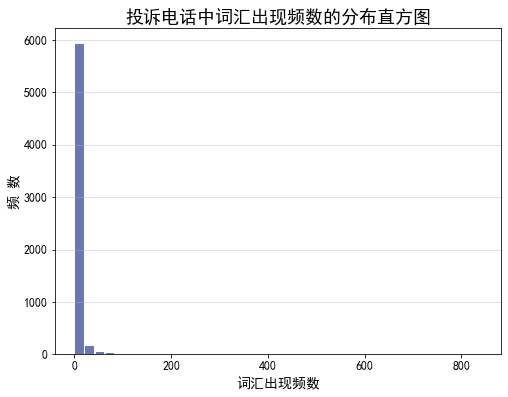

In [242]:
# 求每个词汇的出现频数
word_freq = list(train.iloc[:,1:].apply(lambda x:x.sum(), axis = 0))

# 画图
plt.figure(figsize=(8,6))
plt.hist(x=word_freq, bins=40, color='#2D3D8E', alpha=0.7, rwidth=0.85)
plt.xlabel('词汇出现频数',fontsize=14)
plt.ylabel('频 数',fontsize=14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title('投诉电话中词汇出现频数的分布直方图',fontsize=18)
plt.grid(axis='y', alpha=0.5)
plt.show()

In [243]:
print('词汇出现最大频数为：',max(word_freq))

词汇出现最大频数为： 842


#### 将频数限制在10以下查看：

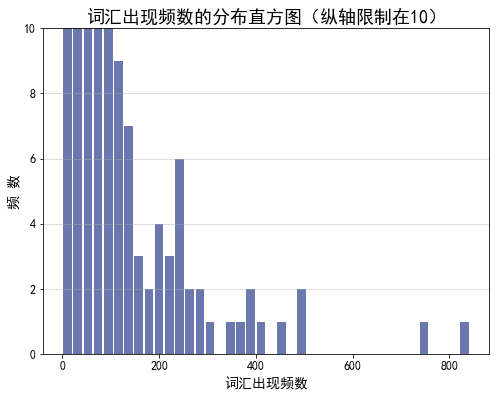

In [244]:
plt.figure(figsize=(8,6))
plt.hist(x=word_freq, bins=40, color='#2D3D8E', alpha=0.7, rwidth=0.85)
plt.xlabel('词汇出现频数',fontsize=14)
plt.ylabel('频 数',fontsize=14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title('词汇出现频数的分布直方图（纵轴限制在10）',fontsize=18)
plt.grid(axis='y', alpha=0.5)
plt.ylim(0,10)
plt.show()

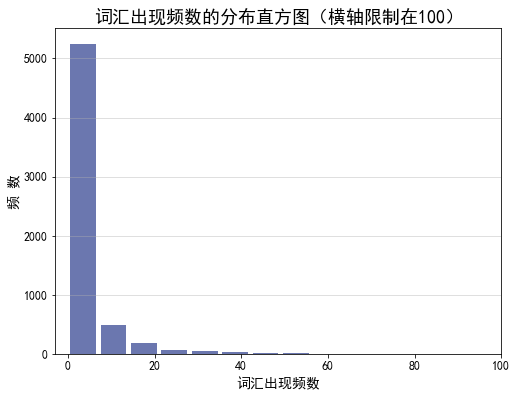

In [253]:
plt.figure(figsize=(8,6))
plt.hist(x=word_freq, bins=120, color='#2D3D8E', alpha=0.7, rwidth=0.85)
plt.xlabel('词汇出现频数',fontsize=14)
plt.ylabel('频 数',fontsize=14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title('词汇出现频数的分布直方图（横轴限制在100）',fontsize=18)
plt.grid(axis='y', alpha=0.5)
plt.xlim(-3,100)
plt.show()

可以看到，存在极少数词语非常高频地出现在投诉中，但绝大部分词汇的频率还是很低的，即绝大部分投诉内容比较分散。


#### 若看单部门的情况，以市运输管理局'为例：

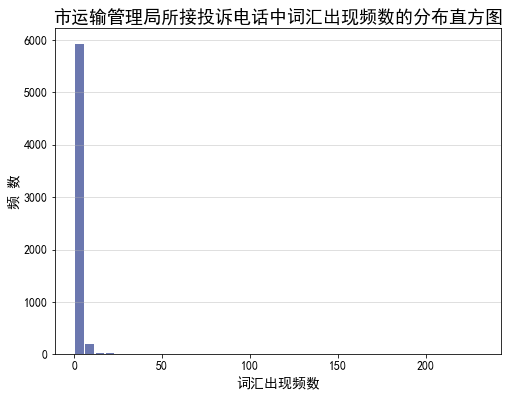

In [269]:
# 求每个词汇的出现频数
sgrgs = train[train['单位名称']=='市运输管理局']
word_freq = list(sgrgs.iloc[:,1:].apply(lambda x:x.sum(), axis = 0))

# 画图
plt.figure(figsize=(8,6))
plt.hist(x=word_freq, bins=40, color='#2D3D8E', alpha=0.7, rwidth=0.85)
plt.xlabel('词汇出现频数',fontsize=14)
plt.ylabel('频 数',fontsize=14)
plt.yticks(size = 12)
plt.xticks(size = 12)
plt.title('市运输管理局所接投诉电话中词汇出现频数的分布直方图',fontsize=18)
plt.grid(axis='y', alpha=0.5)
plt.show()

## （c）：各部门所接到的投诉电话长短比较
#### （c1）：统计每条投诉信息的词汇量

In [254]:
dep_word_num = pd.DataFrame({
    '单位名称':train['单位名称'],
    '词数':train.iloc[:,1:].apply(lambda x:x.sum(), axis = 1)})
dep_word_num

,单位名称,词数
0,市供热公司,8
1,市水务集团,7
2,市水务集团,33
3,市燃气集团,19
4,市公交集团,11
...,...,...
1895,市供热公司,16
1896,市公交集团,15
1897,市房地集团,12
1898,市水务集团,13


#### （c2）：按照政府部门绘制箱线图

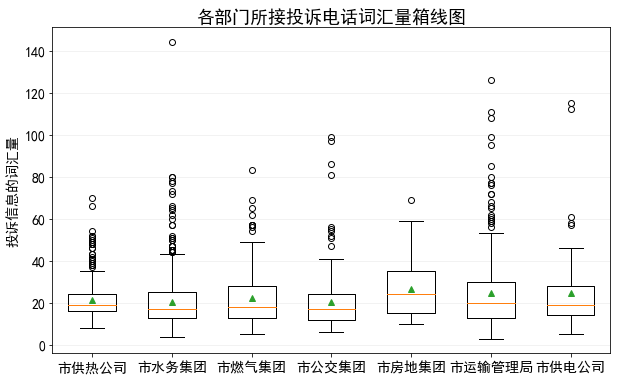

In [255]:
plt.figure(figsize=(10,6))
plt.title('各部门所接投诉电话词汇量箱线图',fontsize=18)
labels = dep_list

plt.boxplot([dep_word_num[dep_word_num['单位名称'] == '市供热公司']['词数'], 
             dep_word_num[dep_word_num['单位名称'] == '市水务集团']['词数'],
             dep_word_num[dep_word_num['单位名称'] == '市燃气集团']['词数'],
             dep_word_num[dep_word_num['单位名称'] == '市公交集团']['词数'],
             dep_word_num[dep_word_num['单位名称'] == '市房地集团']['词数'],
             dep_word_num[dep_word_num['单位名称'] == '市运输管理局']['词数'],
             dep_word_num[dep_word_num['单位名称'] == '市供电公司']['词数']],
            labels = labels, showmeans = True, widths = 0.6)
plt.ylabel('投诉信息的词汇量',fontsize=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.grid(axis='y', alpha=0.2)

plt.show()

从上图可以看到：
* 房地集团所接到的投诉电话词汇量的上下四分位数、中位数与平均数都是各部门中最大的，即整体来说，市民对房地产相关的投诉所含信息量较大。
* 运输管理局所接到的投诉电话词汇量的下限低、上限高、离群值多，且中位数与平均数也较大。说明市民对运输相关的投诉差别较大。
* 供热公司所接到的电话投诉所含信息量多少是波动最小的。

## （d）：市房地集团所接投诉的关键词词云图

In [259]:
# 市房地集团所接投诉中的各词汇出现频数
sfdjt = train[train['单位名称'] == '市房地集团'].iloc[:,1:].apply(lambda x: x.sum(), axis = 0)
sfdjt

换车      0
商户      0
吉林大路    3
还在      0
给出      1
       ..
提醒      0
照       1
煦       0
煤       0
后门      0
Length: 6235, dtype: int64

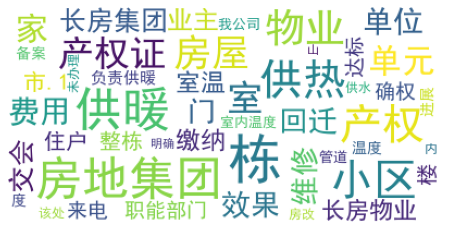

In [257]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white',max_words = 50,font_path='simhei.ttf',
               min_font_size = 10, max_font_size = 50)
wc.generate_from_frequencies(sfdjt)
plt.figure(figsize=(8,4))
plt.imshow(wc)
plt.axis('off')  
plt.show()

由词云图可看出，市民对房地集团的投诉集中于供热供暖、物业、产权、手续办理等方面。

## （e）：使用朴素贝叶斯对市政电话文本进行分类
#### （e1）：将非0频数替换为1，代表该词语出现

In [167]:
train4nb = train.iloc[:,1:].apply(lambda x: [1 if i>0 else 0 for i in list(x)])
train4nb = pd.concat([train['单位名称'], train4nb], axis = 1)
train4nb.head()

,单位名称,换车,商户,吉林大路,还在,给出,安全标准,地,是因为,东北师范大学,...,绿园,门将,研究所,世纪家园,水务,提醒,照,煦,煤,后门
0,市供热公司,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,市水务集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,市水务集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,市燃气集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,市公交集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### （e2）：NB拟合与预测

In [157]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(train4nb.iloc[:,1:], train4nb['单位名称'])
y_pred=clf.predict(test.iloc[:,1:])

#### （e3）：计算混淆矩阵

In [177]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(test.iloc[:,0], y_pred, labels = dep_list)
print('混淆矩阵：\n',cm) 

混淆矩阵：
 [[15  0  0  0  2  0  0]
 [ 0 32  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 13  0  2  0]
 [ 1  2  1  0  2  0  0]
 [ 0  0  0  0  0 14  0]
 [ 0  0  2  0  0  0  2]]


#### （e4）：混淆矩阵可视化

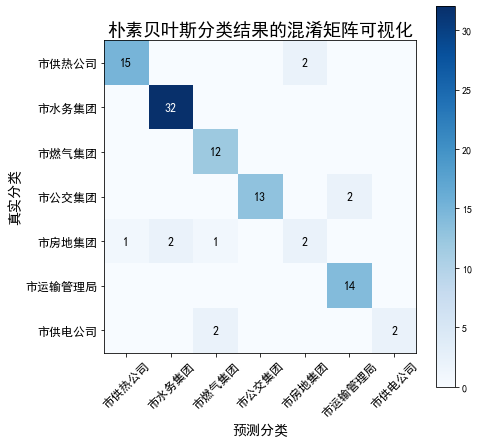

In [231]:
plt.figure(figsize=(7,7))
plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.colorbar()
plt.title('朴素贝叶斯分类结果的混淆矩阵可视化',fontsize=18)

num_local = np.array(range(len(dep_list)))
plt.xticks(num_local, dep_list, rotation=45)  # x轴标签，倾斜45度
plt.yticks(num_local, dep_list)  # y轴标签
plt.ylabel('真实分类',fontsize=14)
plt.xlabel('预测分类',fontsize=14)
plt.yticks(size = 12)
plt.xticks(size = 12)

# 显示方格内的数字
for i in range(len(dep_list)):
    for j in range(len(dep_list)):
        if cm[i][j] > 0: # 频数0不显示
            plt.text(j,i, format(int(cm[i][j])), size = 12,
                     ha="center", va="center",
                     color="white" if cm[i][j] > 20 else "black")   # 深色底用白字       

plt.show()

混淆矩阵表明：除房地集团与出供电公司以外，朴素贝叶斯能较好地根据投诉电话中的词语来预测投诉受理部门。这与房地集团本身所受理投诉内容与其他部门的交叉性有关，从（d）中的词云图也可看出，供热与供水出现在了房地所接投诉的高频词中，而这也与供热公司、水务集团、燃气集团有着必然的联系。此外，供电公司由于训练集中样本数量较少，可能导致其概率估计的不稳定。